# Potential Energy Scans and Visualisation of Trajectories


The range of problems that can be tackled with Psi4 or other electronic structure packages is not limited
to wavefunction or geometry optimisations. We can use python to create complex inputs, adjusting various settings, or making specific modifications of
some variables. 

In this set of exercises, you will instruct Psi4 to
selectively scan one degree of freedom of a potential energy surface.

## Scanning a Potential Energy Surface: Dihedral Scan of Butane


Potential energy surfaces (PES) are complex objects which are, in
general, 3N-6 dimensional, where N is the number of atoms. Therefore, obtaining the complete topology of
a PES is not feasible for most molecules. However, one may limit the
sampling of the surface to a few degrees of freedom that are of interest
and relevant to the problem under examination (*cf.* figure 1). Scans
along limited degrees of freedom may be helpful if one needs information
about various possible (local) minima, for example if (or whether) one
is trapped in one of them. In practice, the degrees of freedom can be
defined by a Z-matrix, such as the one that you have already been using
in the previous exercises.



```{figure} ../../images/pesslize.jpg
---
name: PES
---
Example of a 2D PES (right) and a 1D potential energy profile (left)
obtained by considering only one degree of freedom.
```



In a *relaxed PES scan*, all degrees of freedom that are not under
consideration are optimised, and one obtains a minimum energy path along
the chosen degree(s) of freedom. This implies that a constrained
optimisation is carried out for each desired value of the degree of
freedom that is being sampled.
Instead, one may freeze the remaining degrees of
freedom, keeping them fixed at their initial values, lowering the computational cost. This procedure is
referred to as a *rigid PES scan*. For simple scans of bond angles or
lengths in a pre-optimised structure, this is often sufficient (and more
efficient). 

In this exercise, you will perform a relaxed potential energy
scan of the dihedral in butane in order to determine the possible
configurational minima, and the rotational barrier.

In [6]:
import psi4
import py3Dmol
import numpy as np
import matplotlib.pyplot as plt

In [7]:
psi4.set_num_threads(2)
psi4.set_memory('2 GB')

2000000000

In [8]:
import sys
sys.path.append("..")
from helpers import *

### Starting geometry

In [9]:
butane = psi4.geometry("""
0 1
symmetry c1
 C   -0.574898269478    0.504464946904    0.002857403041
 C    0.574897889171   -0.504464956128    0.002852323696
 C   -1.952555649148   -0.156973625260   -0.002714475295
 C    1.952555886024    0.156973652497   -0.002581128735
 H   -0.482337591908    1.153589194213   -0.865497092594
 H   -0.486779969577    1.148810594948    0.875228985704
 H    0.486726518666   -1.148880661714    0.875166539075
 H    0.482391583848   -1.153518537029   -0.865560612888
 H   -2.083450168132   -0.782621265854   -0.881234078511
 H   -2.088869387618   -0.785799807033    0.872685653169
 H   -2.745769632423    0.584304626628   -0.003839522994
 H    2.083505309790    0.782692137537   -0.881042037137
 H    2.745769132889   -0.584305467493   -0.003716913318
 H    2.088815912268    0.785728971311    0.872878191372
""")

In [10]:
drawXYZ_labeled(butane)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
drawXYZ(butane)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Relaxed PES scan

Now that we had a look at the butane molecule, let's perform the relaxed PES scan. We will fix the dihedral angle at different values and optimize the other degrees of freedom.

In [7]:
psi4.core.clean_options()
psi4.core.clean()
psi4.core.clean_variables()

In [8]:
#First optimize the butane molecule 
#from the starting geometry provided
#use the bylp method and the 6-31+G* basis set



In [9]:
dihedrals = np.linspace(180,-175, 72) #We set here the dihedrals that we are going to use for the scan
PES = {} #Here we will store the optimized energy for each dihedral
geometries = [] #Here we will store the optimized geometries

In [10]:
for dihedral in dihedrals:
    print(dihedral)
    psi4.set_options({
    "fixed_dihedral": "3 1 2 4 "+str(dihedral), #This option specifies the dihedral angles between atoms to be fixed
    "geom_maxiter":500 #This option sets the maximum number of geometry optimization steps
     }) 
    
    #Perform the optimization of the butame molecule here
    #use the bylp method and the 6-31+G* basis set
    E = None
    
    geometries.append(butane.clone())
    PES[dihedral] = E


180.0
175.0
170.0
165.0
160.0
155.0
150.0
145.0
140.0
135.0
130.0
125.0
120.0
115.0
110.0
105.0
100.0
95.0
90.0
85.0
80.0
75.0
70.0
65.0
60.0
55.0
50.0
45.0
40.0
35.0
30.0
25.0
20.0
15.0
10.0
5.0
0.0
-5.0
-10.0
-15.0
-20.0
-25.0
-30.0
-35.0
-40.0
-45.0
-50.0
-55.0
-60.0
-65.0
-70.0
-75.0
-80.0
-85.0
-90.0
-95.0
-100.0
-105.0
-110.0
-115.0
-120.0
-125.0
-130.0
-135.0
-140.0
-145.0
-150.0
-155.0
-160.0
-165.0
-170.0
-175.0


In [11]:
#Convert the energy units to kcal/mol
#you can use psi4.constants.hartree2kcalmol for the unit conversion 
energies = None

#Rescale the energy scale by setting the minimum value as the zero of the scale
#and change everything accordingly
energies = None

### Visualization of the Results

Now, let’s plot the PES at the different dihedral considered. You can use a little helper function which will read in the optimized geometries just calculated and the dihedrals and return the PES and the corresponding geometry at each dihedral value.

interactive(children=(IntSlider(value=0, description='quantity', max=180, min=-175, step=5), Output()), _dom_c…

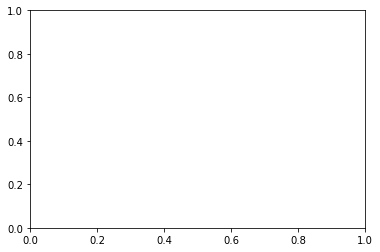

In [13]:
traj = [geom.save_string_xyz_file() for geom in geometries]
traj_arrays = [geom.to_arrays()[0] for geom in geometries]
drawXYZGeomSliderMolecularProperty(traj, dihedrals, energies, 'dihedral')

Now, we can monitor different quantities during the rigid PES scan, to understand how the different dihedrals affect the overall geometry. One example is the bond length between C atoms 1 and 2, the central atoms of the dihedral for which we performed the scan. Having a look at the fluctuations of this bond legth during the scan can be easily done using one of the helper functions, which will read the coordinates of the two atoms and calculate their distance.

In [14]:
bond_length = []

for geom in traj_arrays:
    bond_length.append(calculate_bond(geom[0], geom[1])) #Here the bond length is calculated and saved

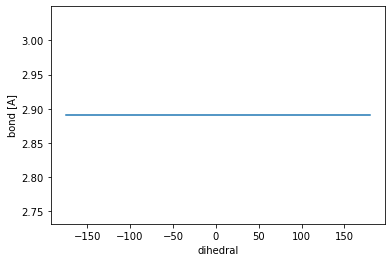

In [15]:
fig, ax = plt.subplots(1)
ax.plot(dihedrals, bond_length)
ax.set_xlabel('dihedral')
ax.set_ylabel('bond [A]')
plt.show()

```{admonition} Exercise 1
:class: exercise    
Plot the fluctuations of the dihedral that you used in the rigid
    scan and show this plot in your report.
```

```{admonition} Exercise 2
:class: exercise    
Does the bond length of the $H_3CH_2C-CH_2CH_3$ bond fluctuate as
    the dihedral is changed? Why (not)?
```

```{admonition} Exercise 3
:class: exercise    
Create a potential energy profile along the dihedral by plotting the
    energies of the system as a function of the scanned dihedral angle as done above.
    Then, to each maximum and minimum, assign the corresponding
    conformation from your trajectory. Show these conformations in your
    report.
    Assign also names to the conformations according to the *Newman
    projections* you know from organic chemistry (where possible).

```

```{admonition} Exercise 4
:class: exercise    
The rotational barrier of butane lies between 5 and 6 kcal
    mol$^{-1}$ [^Murcko1996]. Compare this value with the one you calculated and explain possible sources of error, leading to higher or lower barriers.
```
[^Murcko1996] : Murcko M. A., Castejon H., Wiberg K.B., J. Phys. Chem., 1996, 100, 16162
